In [2]:
## input: 1. summarizedExperiement(SE) obj for chromVAR 2. Jaspar matrix 
## output: 1. motif x cell (z score) 2. plot: ranked           
source("./libs.R")

### ggraph

In [20]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
theme_set(theme_void())
 
# data: edge list
d1 <- data.frame(from="origin", to=paste("group", seq(1,7), sep=""))
d2 <- data.frame(from=rep(d1$to, each=7), to=paste("subgroup", seq(1,49), sep="_"))
edges <- rbind(d1, d2)
 
# We can add a second data frame with information for each node!
name <- unique(c(as.character(edges$from), as.character(edges$to)))
vertices <- data.frame(
  name=name,
  group=c( rep(NA,8) ,  rep( paste("group", seq(1,7), sep=""), each=7)),
  cluster=sample(letters[1:4], length(name), replace=T),
  value=sample(seq(10,30), length(name), replace=T)
)
 
# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices)

Warning message:
“New theme missing the following elements: axis.title.x, axis.title.x.top, axis.title.y, axis.title.y.right, axis.text.x, axis.text.x.top, axis.text.y, axis.text.y.right, axis.ticks, axis.line, axis.line.x, axis.line.y, legend.background, legend.margin, legend.spacing, legend.spacing.x, legend.spacing.y, legend.key, legend.key.height, legend.key.width, legend.text.align, legend.title.align, legend.direction, legend.justification, legend.box.margin, legend.box.background, legend.box.spacing, panel.background, panel.border, panel.spacing.x, panel.spacing.y, panel.grid, panel.grid.minor, plot.background, strip.background, strip.placement, strip.text.x, strip.text.y”

In [26]:
edges%>%head(1)
vertices%>%head(1)

from,to
origin,group1


name,group,cluster,value
origin,NA,b,14


In [42]:
print_all(mygraph)

IGRAPH c12f9fd DN-- 11 10 -- 
+ attr: name (v/c)
+ edges from c12f9fd (vertex names):
 [1] CEO  ->boss1    CEO  ->boss2    boss1->mister_a boss1->mister_b
 [5] boss1->mister_c boss1->mister_d boss2->mister_e boss2->mister_f
 [9] boss2->mister_g boss2->mister_h


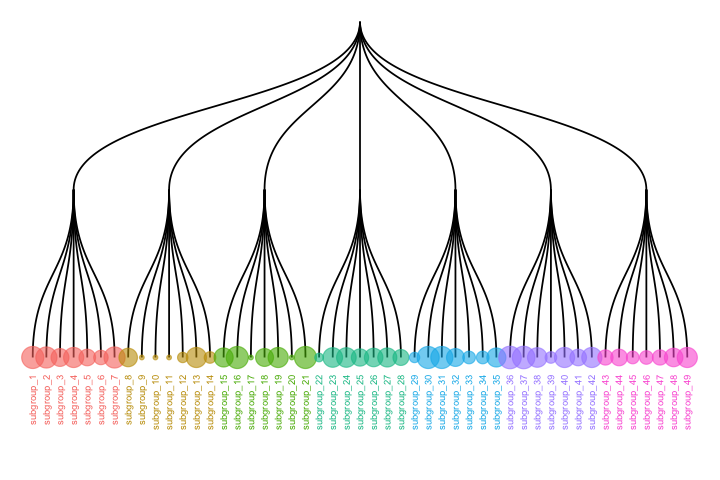

In [30]:
options(repr.plot.width = 6, repr.plot.height = 4)

ggraph(mygraph, layout = "dendrogram") + geom_edge_diagonal() + geom_node_text(aes(label = name, 
    filter = leaf, color = group), size = 2, angle = 90, hjust = 1, nudge_y = -0.1) + 
    geom_node_point(aes(filter = leaf, size = value, color = group), alpha = 0.6) + 
    ylim(-0.6, NA) + theme(legend.position = "none")

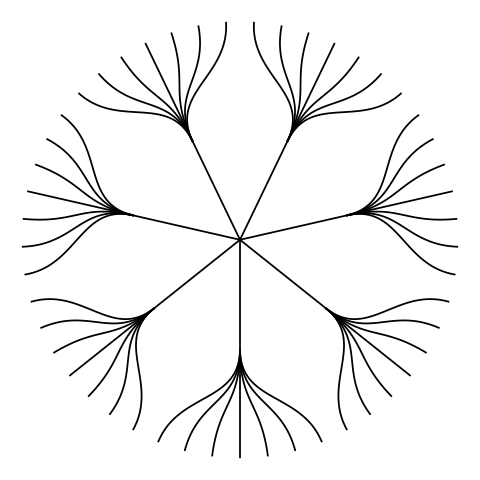

In [23]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggraph(mygraph, layout = "dendrogram", circular = T) + geom_edge_diagonal()

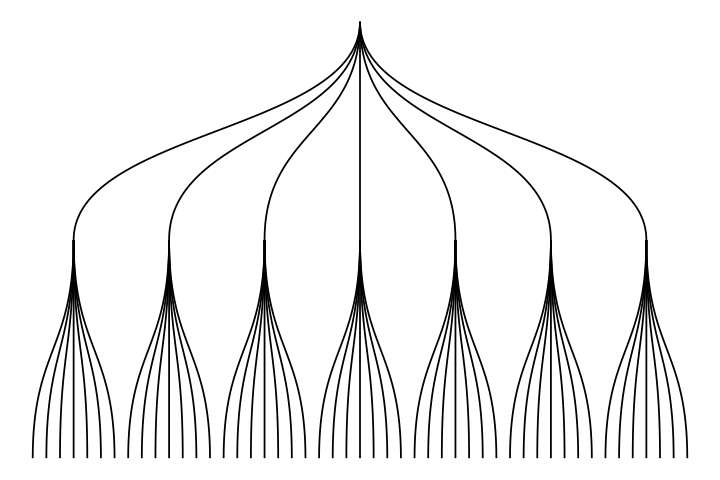

In [21]:
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() 

### data viz blog

Warning message in if (params$x != 0) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (params$y != 0) {:
“the condition has length > 1 and only the first element will be used”

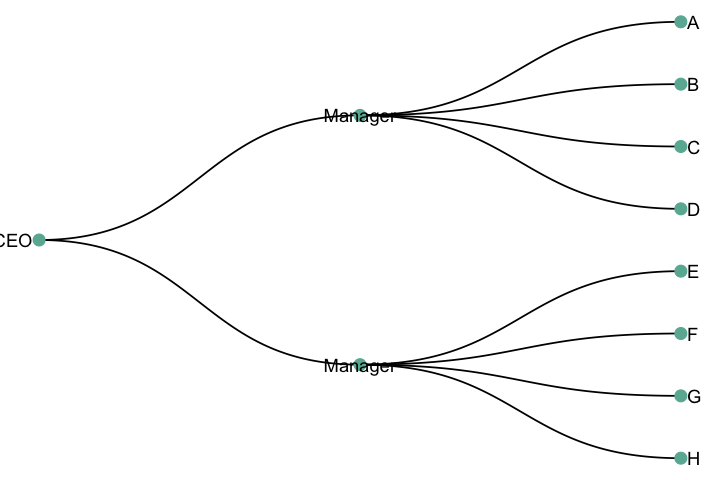

In [34]:
# libraries
library(ggraph)
library(igraph)
library(tidyverse)
library(dendextend)
library(colormap)
library(kableExtra)
options(knitr.table.format = "html")

# create a data frame 
data=data.frame(
  level1="CEO",
  level2=c( rep("boss1",4), rep("boss2",4)),
  level3=paste0("mister_", letters[1:8])
)
 
# transform it to a edge list!
edges_level1_2 = data %>% select(level1, level2) %>% unique %>% rename(from=level1, to=level2)
edges_level2_3 = data %>% select(level2, level3) %>% unique %>% rename(from=level2, to=level3)
edge_list=rbind(edges_level1_2, edges_level2_3)
 
# Now we can plot that
mygraph <- graph_from_data_frame( edge_list )
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() +
  geom_node_point(color="#69b3a2", size=3) +
  geom_node_text(
    aes(  label=c("CEO", "Manager", "Manager", LETTERS[8:1]) ), 
    hjust=c(1,0.5, 0.5, rep(0,8)), 
    nudge_y = c(-.02, 0, 0, rep(.02,8)),
    nudge_x = c(0, .3, .3, rep(0,8))
  ) +
  theme_void() +
  coord_flip() +
  scale_y_reverse() 

### Motif db

In [3]:
ttest.res <- fread("~/Dropbox (UCSD_Epigenomics)/workReports/2019-08-27_islet/chromVar_ttest_res.csv")
head(ttest.res,1)

rank,motif,mean_x,mean_y,pval,test,x,y,enriched,FDR,padj,diff,id
1,MAFG,0.4259281,-2.01688,1.42e-74,alpha_vs_gamma,alpha,gamma,alpha,5.4812e-72,5.4812e-72,2.442808,MA0659.1


In [4]:
tfclass.db.dic <- readRDS("~/github/atacMotif/db/dic_jaspar_tfclass.rds")
tfclass.db <- readRDS('~/github/atacMotif/db/tfclass.rds')
str(tfclass.db)

List of 7
 $ subfamily :'data.frame':	337 obs. of  3 variables:
  ..$ id  : chr [1:337] "1.1.1.1" "1.1.1.2" "1.1.1.3" "1.1.2.1" ...
  ..$ name: chr [1:337] "Jun" "NFE2" "ATF2" "Fos" ...
  ..$ seq : chr [1:337] "TGAGTCA" "GCTGAGTCA" "TGACGTCA" "TGAGTCA" ...
 $ family    :'data.frame':	110 obs. of  2 variables:
  ..$ id  : chr [1:110] "0.0.1" "0.0.2" "0.0.3" "0.0.4" ...
  ..$ name: chr [1:110] "NULP1" "PHF5" "RFXANK" "RFXAP" ...
 $ genus     :'data.frame':	1453 obs. of  2 variables:
  ..$ id  : chr [1:1453] "3.5.1.1.2" "3.1.8.1.1" "3.1.8.1.2" "2.3.2.4.9" ...
  ..$ name: chr [1:1453] "A-Myb (MYBL1)" "ADNP1" "ADNP2" "AEBP2" ...
 $ genus.dup :'data.frame':	4 obs. of  2 variables:
  ..$ id  : chr [1:4] "3.5.1.3.4" "3.5.1.3.5" "3.5.1.3.6" "3.5.1.3.7"
  ..$ name: chr [1:4] "MTA1" "MTA2" "MTA3" "RERE"
 $ merge     :'data.frame':	1475 obs. of  9 variables:
  ..$ genus.id      : chr [1:1475] "3.1.8.1.1" "3.1.8.1.2" "2.3.2.4.9" "1.2.5.1.1" ...
  ..$ genus.name    : chr [1:1475] "ADNP1" "ADNP2" "AE

In [11]:
dim(ttest.res)
ttest.res.2 <- (ttest.res %>% left_join(tfclass.db.dic$merged %>% select(jaspar.id, family.id, 
    family.name), by = c(id = "jaspar.id"))%>%unique())
ttest.res.2%>%head(1)


df <- (ttest.res.2 %>% filter(FDR < 0.01) %>% ungroup %>% select(family.id, family.name) %>% 
    drop_na)%>%unique%>%mutate(family.id=paste0('0.',family.id))

[1] 772  13

rank,motif,mean_x,mean_y,pval,test,x,y,enriched,FDR,padj,diff,id,family.id,family.name
1,MAFG,0.4259281,-2.01688,1.42e-74,alpha_vs_gamma,alpha,gamma,alpha,5.4812e-72,5.4812e-72,2.442808,MA0659.1,NA,NA


In [13]:
head(df,1)%>%tidyr::gather(key = pathString,)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

pathString,value
family.id,0.1.1.3
family.name,Maf-related


### plots - ranked bars

In [44]:
#require(devtools)
#install_github("jokergoo/ComplexHeatmap")
require(ComplexHeatmap)

In [43]:
ttest.res <- ttest.res %>% mutate(padj.1 = ifelse(enriched %in% c("gamma", "delta"), 
    -FDR, FDR))%>%arrange(enriched,padj.1)%>%select(-padj.1)

In [45]:
ttest.res <- ttest.res %>% mutate(diff = mean_x - mean_y) %>% arrange(test, diff) 

In [48]:
require(circlize)

rank,motif,mean_x,mean_y,pval,test,x,y,enriched,FDR,padj,diff,id
191,ELF5,-0.03122941,0.9949915,9.07e-21,alpha_vs_gamma,alpha,gamma,gamma,2.059424e-19,3.50102e-18,-1.026221,MA0136.2


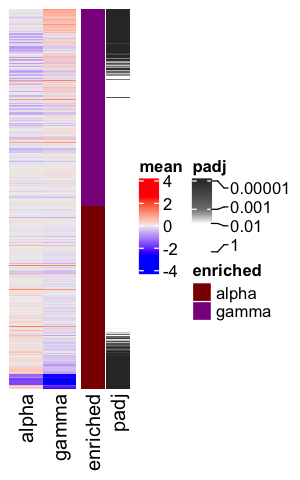

In [49]:
options(repr.plot.width = 2.5, repr.plot.height = 4)

ttest.res %>% head(1)
pd.rank <- ttest.res %>% filter(test == "alpha_vs_gamma") %>% ungroup
# pd.rank <- ttest.res %>% filter(test == 'beta_vs_delta')
require(ComplexHeatmap)
pvalue_col_fun = colorRamp2(c(0, 2, 3, 5), c("white", "grey100", "grey50", "grey20"))
ha = rowAnnotation(enriched = anno_simple(pd.rank %>% pull(enriched), col = c(alpha = "darkred", 
    gamma = "magenta4")), padj = anno_simple(-log10(pd.rank %>% pull(padj)), col = pvalue_col_fun))
ht = Heatmap(pd.rank %>% select(starts_with("mean")) %>% rename(alpha = mean_x, gamma = mean_y) %>% 
    as.matrix(), right_annotation = ha, cluster_rows = F, name = "mean", cluster_columns = F)
lgd_pvalue = Legend(title = "padj", col = pvalue_col_fun, at = c(0, 2, 3, 5), labels = c("1", 
    "0.01", "0.001", "0.00001"))
lgd_enriched = Legend(title = "enriched", legend_gp = gpar(fill = c("darkred", "magenta4")), 
    labels = c("alpha", "gamma"))

draw(ht, annotation_legend_list = list(lgd_pvalue, lgd_enriched))

In [51]:
require(circlize)
require(pals)

In [ ]:
cols<- colorRampPalette(c('orange','green'))(6)


In [54]:
pd.rank.2 <- pd.rank %>% unite(family, family.id, family.name, sep = ":") %>% group_by(family) %>% 
    summarise(mean_beta = mean(mean_x), mean_delta = mean(mean_y)) %>% mutate(diff = mean_beta - 
    mean_delta) %>% drop_na %>% arrange(diff) %>% as.data.frame%>%column_to_rownames("family")
head(pd.rank.2, 1)
pheatmap(pd.rank.2 %>% select(-diff), annotation_row = pd.rank.2 %>% select(diff), color = coolwarm(51),
    scale = "none", cluster_cols = F, cluster_rows = F, fontsize = 8)

ERROR: Error in .f(.x[[i]], ...): object 'family.id' not found


rank,motif,mean_x,mean_y,pval,test,x,y,enriched,FDR,padj,diff,id
1,MAFG,0.4259281,-2.01688,1.42e-74,alpha_vs_gamma,alpha,gamma,alpha,5.4812e-72,5.4812e-72,2.442808,MA0659.1


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Three-zinc finger Krüppel-related' in 'mbcsToSbcs': dot substituted for <cc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Three-zinc finger Krüppel-related' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Three-zinc finger Krüppel-related' in 'mbcsToSbcs': dot substituted for <cc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Three-zinc finger Krüppel-related' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Three-zinc finger Krüppel-related' in 'mbcsToSbcs': dot substituted for <cc>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x,

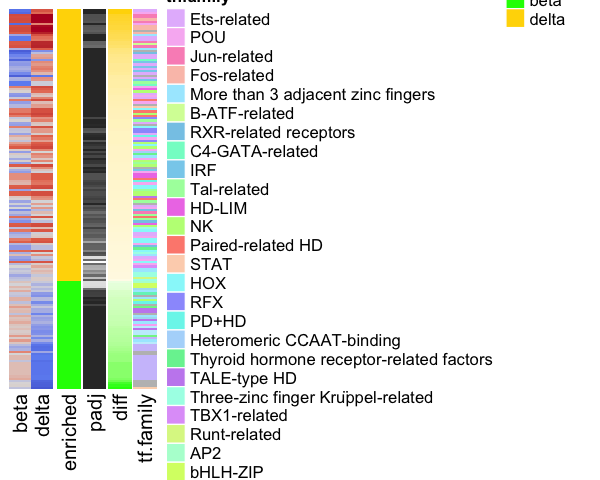

In [37]:
options(repr.plot.width = 5, repr.plot.height = 4)

ttest.res %>% head(1)
# pd.rank <- ttest.res %>% filter(test == 'alpha_vs_gamma') %>% ungroup
pd.rank <- ttest.res.2 %>% filter(test == "beta_vs_delta") %>% ungroup %>% arrange(diff) %>% 
    filter(padj < 0.01)
require(ComplexHeatmap)
pvalue_col_fun = colorRamp2(c(0, 2, 3, 10), c("white", "grey100", "grey50", "grey20"))
cls <- coolwarm(7)

main_col_fun = colorRamp2(c(-2, -0.5, 0, 0.5, 2), c(cls[1:2], cls[4], cls[6:7]))
ha = rowAnnotation(enriched = anno_simple(pd.rank %>% pull(enriched), col = c(beta = "green", 
    delta = "gold")), padj = anno_simple(-log10(pd.rank %>% pull(padj)), col = pvalue_col_fun), 
    diff = anno_simple(pd.rank$diff, col = colorRamp2(c(-1.3, 0, 1.1), c("gold", 
        "white", "green"))))
ht = Heatmap(col = main_col_fun, pd.rank %>% select(starts_with("mean")) %>% rename(beta = mean_x, 
    delta = mean_y) %>% as.matrix(), right_annotation = ha, cluster_rows = F, name = "mean", 
    cluster_columns = F)
lgd_pvalue = Legend(title = "padj", col = pvalue_col_fun, at = c(0, 2, 3, 50), labels = c("1", 
    "0.01", "0.001", "1e-50"))
lgd_enriched = Legend(title = "enriched", legend_gp = gpar(fill = c("green", "gold")), 
    labels = c("beta", "delta"))

draw(ht, annotation_legend_list = list(lgd_pvalue, lgd_enriched))